## 02 Exploring relationships
#### This script contains the following points:
1. Importing Visualization Libraries and Data
2. Data Cleaning
3. Exploring Relationships
   - Correlations
   - Scatterplots
   - Pair Plots
   - Categorical Plots
   - Additional Viz
4. Hypotheses
5. Export data

## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.8.0'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Import data set
path=r'/Users/dariaperestiuk/Desktop/HW Data Analyst/Oil Price Project'
df=pd.read_csv(os.path.join(path, '01 Data', 'Prepared Data', 'cleaned_merged.csv'))

In [16]:
df.head()

,Country,Country Group,OPEC Member,Year,Crude oil production,Oil demand,Crude oil exports,Imports of crude oil,GDP
0,Algeria,Africa,Yes,1960,181.1,23.496816,NaN,NaN,2.723649e+09
1,Algeria,Africa,Yes,1961,330.9,21.029114,NaN,NaN,2.434777e+09
2,Algeria,Africa,Yes,1962,436.9,12.553093,NaN,NaN,2.001469e+09
3,Algeria,Africa,Yes,1963,504.3,14.269756,NaN,NaN,2.703015e+09
4,Algeria,Africa,Yes,1964,557.8,22.531193,NaN,NaN,2.909352e+09


## 2. Data Cleaning

In [6]:
df.shape

(13205, 10)

In [7]:
df.columns

Index(['Unnamed: 0', 'Country', 'Country Group', 'OPEC Member', 'Year',
       ' Crude oil production', 'Oil demand', 'Crude oil exports',
       'Imports of crude oil', 'GDP'],
      dtype='object')

In [8]:
# dropping column 
df=df.drop(columns = ['Unnamed: 0'])

In [17]:
df.dtypes

Country                   object
Country Group             object
OPEC Member               object
Year                       int64
 Crude oil production    float64
Oil demand               float64
Crude oil exports        float64
Imports of crude oil     float64
GDP                      float64
dtype: object

## 3. Exploring Relationships

### Correlations:

In [45]:
# Create a subset excluding string columns

sub = df_final[[' Crude oil production', 'Oil demand', 'Crude oil exports', 'Imports of crude oil', 'GDP', 'Oil Price']]

In [32]:
df_oil_price=pd.read_csv(os.path.join(path, '01 Data', 'oil_price.csv'))

In [42]:
df_final = pd.merge(df, df_oil_price,  how='right', left_on=['Year'], right_on = ['Year'])

In [34]:
df_final.columns

Index(['Country', 'Country Group', 'OPEC Member', 'Year',
       ' Crude oil production', 'Oil demand', 'Crude oil exports',
       'Imports of crude oil', 'GDP', 'Oil Price'],
      dtype='object')

In [43]:
df_final.head()

,Country,Country Group,OPEC Member,Year,Crude oil production,Oil demand,Crude oil exports,Imports of crude oil,GDP,Oil Price
0,Algeria,Africa,Yes,1987,648.225,174.504877,240.000000,8.142247,6.674227e+10,18.53
1,Angola,Africa,Yes,1987,357.655,29.591633,342.400000,0.000000,6.684492e+09,18.53
2,Argentina,Latin America,No,1987,428.999,485.000000,NaN,NaN,1.111062e+11,18.53
3,Australia,OECD Asia Pacific,No,1987,485.449,661.000000,88.281205,85.471450,1.893760e+11,18.53
4,Azerbaijan,Other Eurasia,No,1987,258.857,NaN,NaN,NaN,NaN,18.53


In [44]:
df_final.shape

(8048, 10)

In [46]:
# Create a correlation matrix using pandas

sub.corr()

,Crude oil production,Oil demand,Crude oil exports,Imports of crude oil,GDP,Oil Price
Crude oil production,1.000000,0.567549,0.791201,0.341541,0.518552,0.048422
Oil demand,0.567549,1.000000,0.014507,0.909990,0.921136,0.048380
Crude oil exports,0.791201,0.014507,1.000000,-0.169345,-0.123850,0.075609
Imports of crude oil,0.341541,0.909990,-0.169345,1.000000,0.928702,0.051868
GDP,0.518552,0.921136,-0.123850,0.928702,1.000000,0.106017
Oil Price,0.048422,0.048380,0.075609,0.051868,0.106017,1.000000


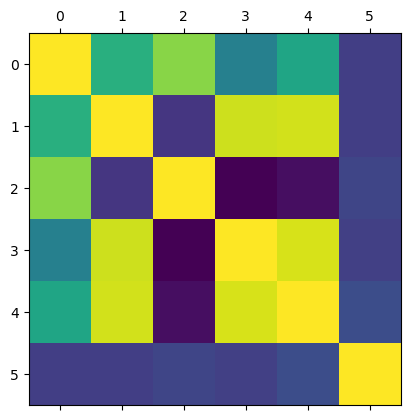

In [47]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

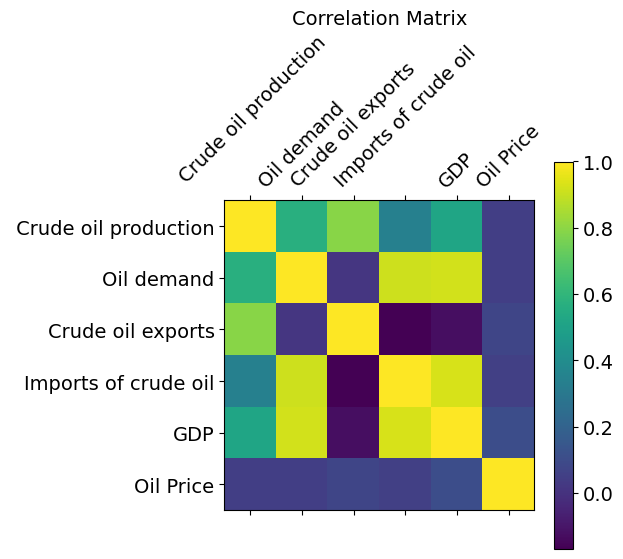

In [90]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(5, 5)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

plt.savefig('heatmap.png', bbox_inches='tight', dpi=300)

#### Create a correlation heatmap using seaborn:

In [48]:
sub

,Crude oil production,Oil demand,Crude oil exports,Imports of crude oil,GDP,Oil Price
0,648.225,174.504877,240.000000,8.142247,6.674227e+10,18.53
1,357.655,29.591633,342.400000,0.000000,6.684492e+09,18.53
2,428.999,485.000000,NaN,NaN,1.111062e+11,18.53
3,485.449,661.000000,88.281205,85.471450,1.893760e+11,18.53
4,258.857,NaN,NaN,NaN,NaN,18.53
...,...,...,...,...,...,...
8043,NaN,NaN,54.083333,0.000000,NaN,100.93
8044,NaN,NaN,NaN,0.000000,NaN,100.93
8045,NaN,NaN,NaN,441.555628,NaN,100.93
8046,NaN,NaN,NaN,0.000000,NaN,100.93


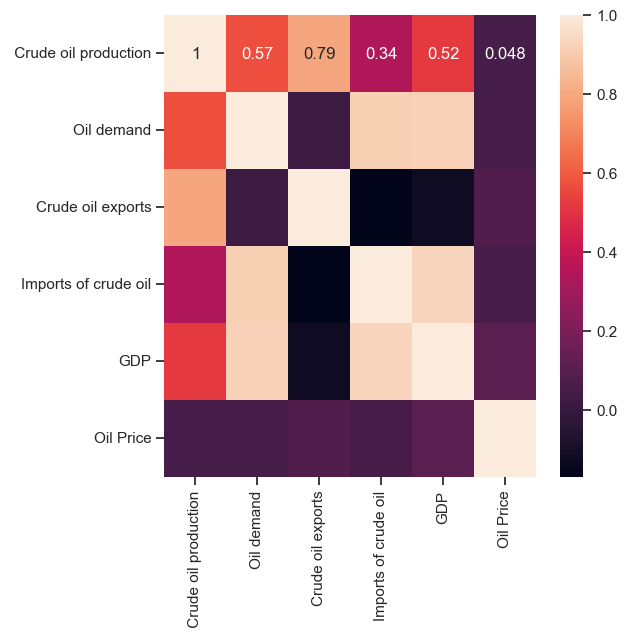

In [207]:
# Create a subplot with matplotlib
fig,ax = plt.subplots(figsize=(6,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
fig.tight_layout()
plt.show()

In [81]:
# Save figure
fig.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'heatmap_corr.png'))

### Scatterplots:

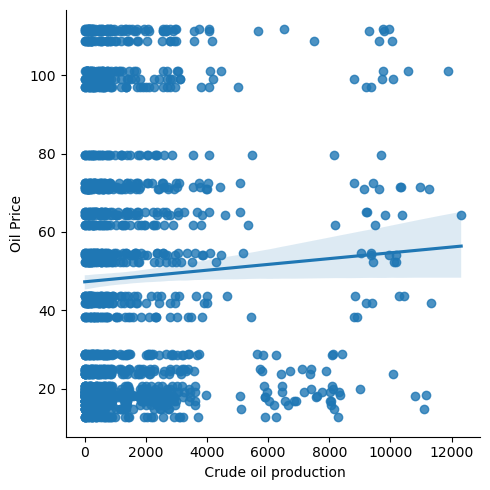

In [94]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = ' Crude oil production', y = 'Oil Price', data = df_final)
plt.savefig('scatterplot_1.png', bbox_inches='tight', dpi=300)

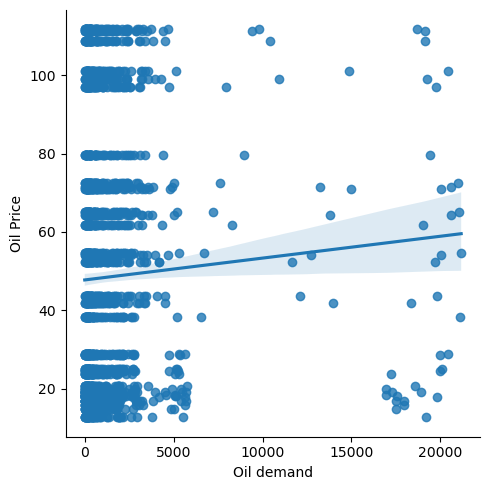

In [95]:
sns.lmplot(x = 'Oil demand', y = 'Oil Price', data = df_final)
plt.savefig('scatterplot_2.png', bbox_inches='tight', dpi=300)

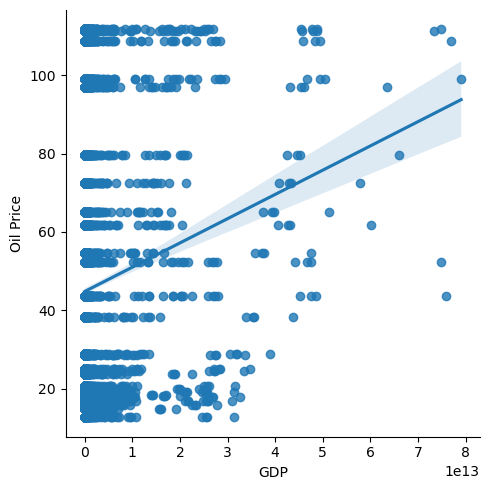

In [97]:
sns.lmplot(x = 'GDP', y = 'Oil Price', data = df_final)
plt.savefig('scatterplot_3.png', bbox_inches='tight', dpi=300)

In [126]:
# Filter only OPEC members
df_opec=df_final[df_final['OPEC Member'] == 'Yes']

In [127]:
df_opec

,Country,Country Group,OPEC Member,Year,Crude oil production,Oil demand,Crude oil exports,Imports of crude oil,GDP,Oil Price
0,Algeria,Africa,Yes,1987,648.225,174.504877,240.000000,8.142247,6.674227e+10,18.53
1,Angola,Africa,Yes,1987,357.655,29.591633,342.400000,0.000000,6.684492e+09,18.53
14,Congo,Africa,Yes,1987,123.000,2.137053,105.407000,0.000000,NaN,18.53
18,Equatorial Guinea,Africa,Yes,1987,0.000,0.500000,0.000000,NaN,9.334585e+07,18.53
19,Gabon,Africa,Yes,1987,154.500,11.661894,145.139000,0.000000,3.281797e+09,18.53
...,...,...,...,...,...,...,...,...,...,...
8000,Libya,Africa,Yes,2022,981.282,192.482721,919.828000,0.000000,NaN,100.93
8003,Nigeria,Africa,Yes,2022,1137.913,517.769785,1388.260236,0.000000,NaN,100.93
8008,Saudi Arabia,Middle East,Yes,2022,10590.912,3172.121882,7363.640000,0.000000,NaN,100.93
8012,United Arab Emirates,Middle East,Yes,2022,3064.181,957.534586,2717.116700,187.186288,NaN,100.93


/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel=' Crude oil production'>

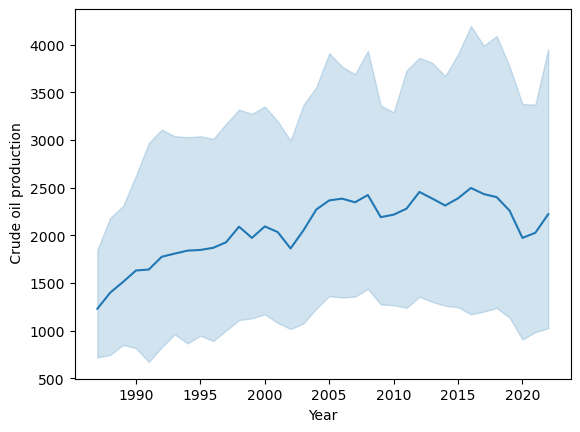

In [128]:
#Line Chart
sns.lineplot(data=df_opec, x='Year', y=' Crude oil production')
#plt.savefig('Line_Chart_yearly_Production.png', bbox_inches='tight', dpi=300)

In [ ]:
sns.lineplot(data=df_opec, x='Year', y='Oil demand')

/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Oil Price'>

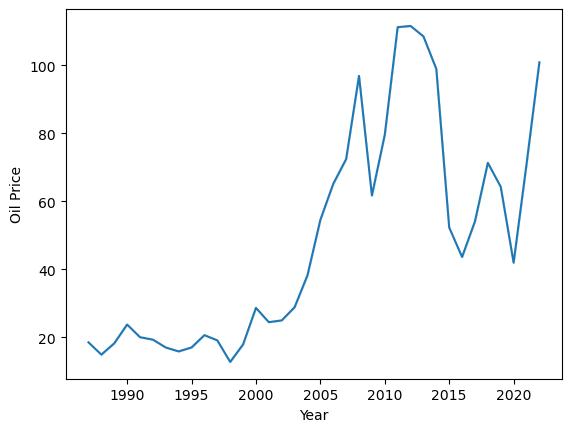

In [130]:
#Line Chart
sns.lineplot(data=df_final, x='Year', y='Oil Price')

In [132]:
sub_opec = df_opec[[' Crude oil production', 'Oil demand', 'Crude oil exports', 'Imports of crude oil', 'GDP', 'Oil Price']]

In [134]:
# Create a correlation matrix using pandas

sub_opec.corr()

,Crude oil production,Oil demand,Crude oil exports,Imports of crude oil,GDP,Oil Price
Crude oil production,1.000000,0.924695,0.980373,0.080483,0.690567,0.103453
Oil demand,0.924695,1.000000,0.898578,0.094143,0.815146,0.187624
Crude oil exports,0.980373,0.898578,1.000000,0.065043,0.719759,0.113145
Imports of crude oil,0.080483,0.094143,0.065043,1.000000,0.149824,0.117363
GDP,0.690567,0.815146,0.719759,0.149824,1.000000,0.512242
Oil Price,0.103453,0.187624,0.113145,0.117363,0.512242,1.000000


### Pair Plots:

In [61]:
sub_2 = sub[[' Crude oil production', 'Oil demand', 'GDP', 'Oil Price']]

/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

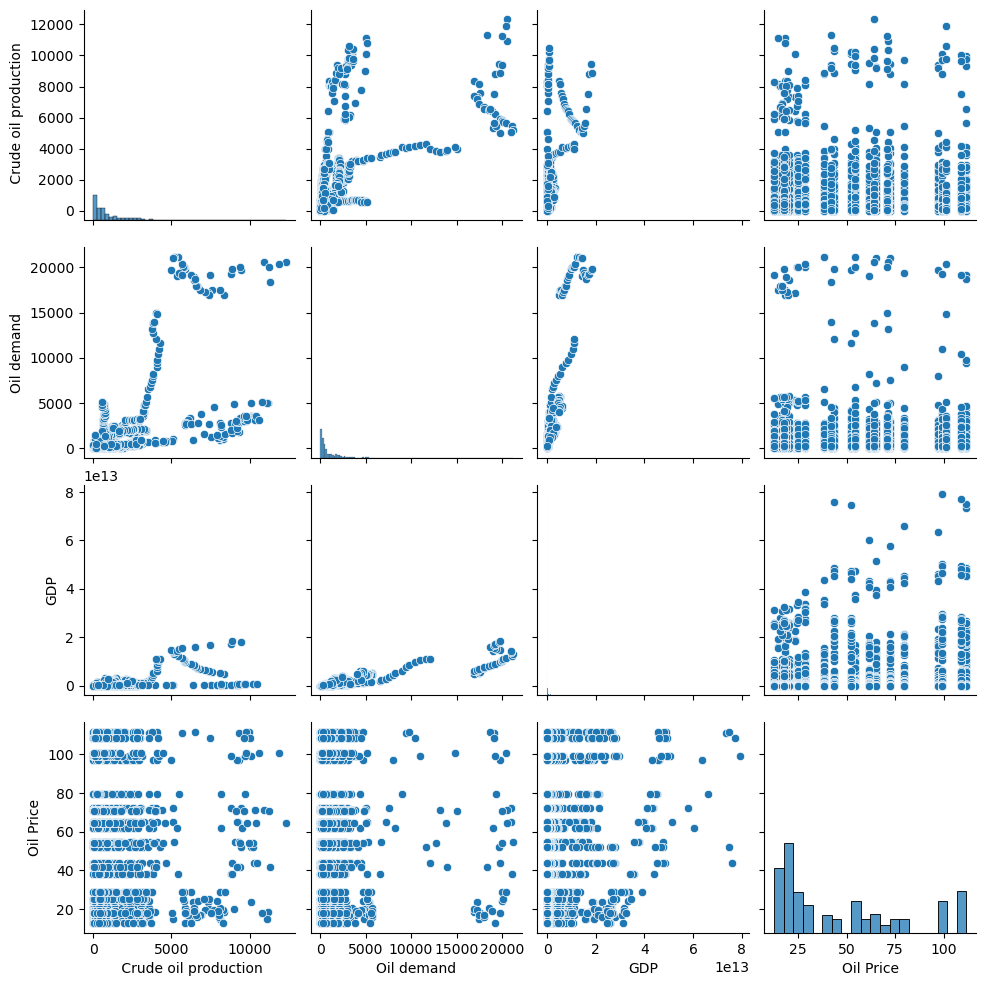

In [62]:
# Create a pair plot 

g = sns.pairplot(sub_2)

In [92]:
# Save figure
g.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'pair_plots.png'))

### Categorical Plots:

/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Oil Price, month', ylabel='Count'>

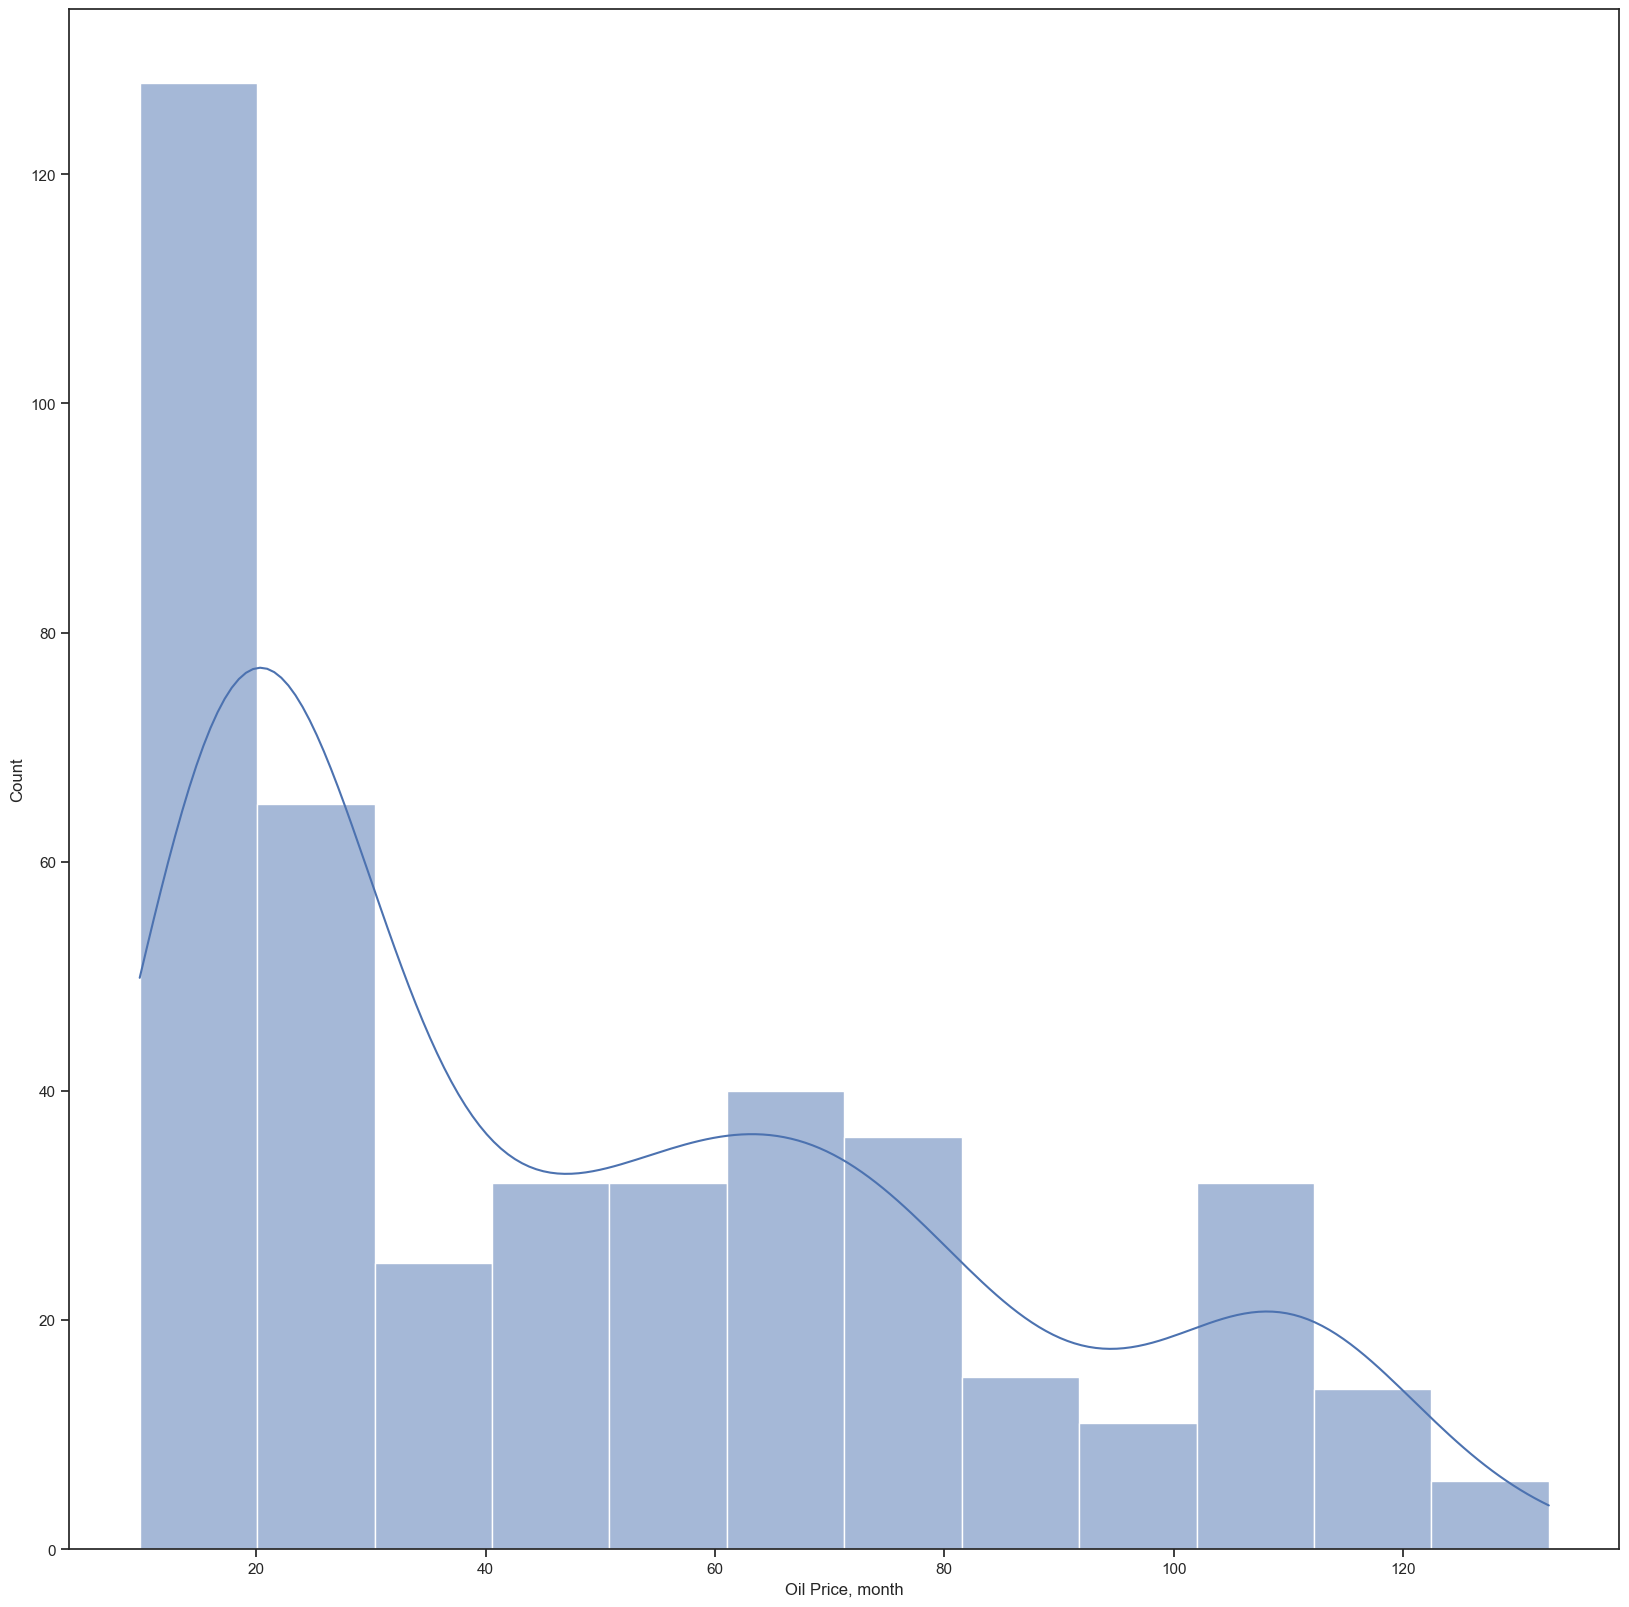

In [193]:
sns.histplot(df_month['Oil Price, month'], bins = 12, kde = True)

In [190]:
# Creating a categorical variable that splits the "Oil Price" column into categories

In [141]:
df_final['Oil Price'].describe()

count    8048.000000
mean       46.771660
std        32.682716
min        12.760000
25%        19.110000
50%        28.850000
75%        70.860000
max       111.630000
Name: Oil Price, dtype: float64

In [152]:
df_month.columns

Index(['Month', 'Year', 'Oil Price, month', 'Price category'], dtype='object')

In [158]:
df_month.loc[df_month['Oil Price, month'] < 28, 'Price category'] = 'Low price'

In [159]:
df_month.loc[(df_month['Oil Price, month'] >= 28) & (df_month['Oil Price, month'] < 70), 'Price category'] = 'Middle price'

In [160]:
df_month.loc[df_month['Oil Price, month'] >= 70, 'Price category'] = 'High price'

In [161]:
df_month['Price category'].value_counts(dropna = False)

Price category
Low price       180
Middle price    137
High price      119
Name: count, dtype: int64

In [162]:
df_month.columns

Index(['Month', 'Year', 'Oil Price, month', 'Price category'], dtype='object')

/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


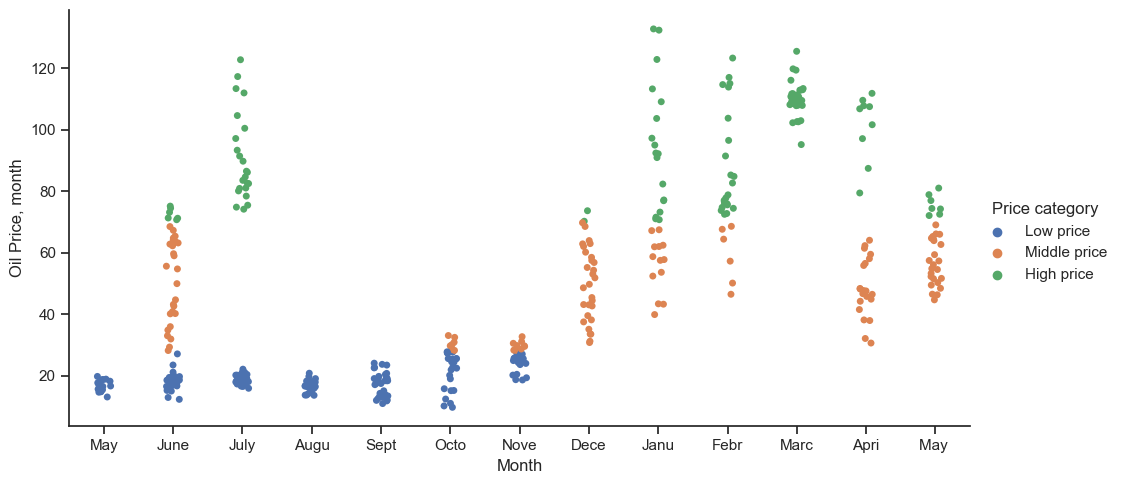

In [189]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
k = sns.catplot(x="Month", y="Oil Price, month", hue="Price category", data=df_month, aspect=2)
plt.savefig('categorical_plot_monthly.png', bbox_inches='tight', dpi=300)

### Additional Viz:

In [98]:
df_month=pd.read_csv(os.path.join(path, '01 Data', 'brent-monthly.csv'))

In [99]:
df_month.columns 

Index(['Month', 'Year', 'Oil Price, month'], dtype='object')

In [104]:
# Check for missing values# Check for missing values
df_month.isnull().sum() # No missing values!

Month               0
Year                0
Oil Price, month    0
dtype: int64

In [106]:
df_month.describe() # data from 1987 to 2023 year

,Year,"Oil Price, month"
count,436.00000,436.000000
mean,2005.00000,49.179679
std,10.50714,32.913268
min,1987.00000,9.820000
25%,1996.00000,19.080000
50%,2005.00000,40.590000
75%,2014.00000,72.590000
max,2023.00000,132.720000


In [102]:
df_month['Month'].value_counts(dropna = False)

Month
June    60
July    54
Augu    31
Octo    31
Dece    31
Janu    31
Marc    31
May     31
Sept    30
Nove    30
Apri    30
Febr    29
May     17
Name: count, dtype: int64

/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


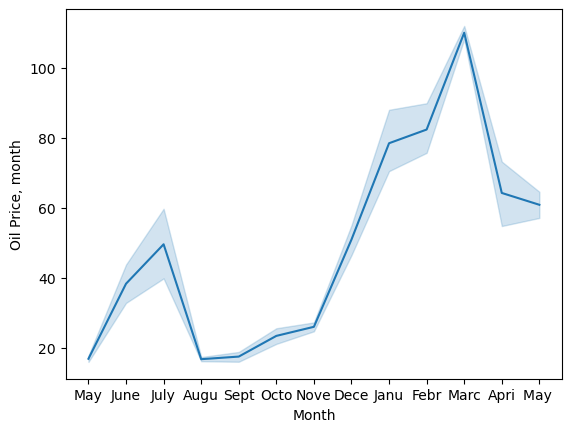

In [108]:
#Line Chart
j=sns.lineplot(data=df_month, x='Month', y='Oil Price, month')
plt.savefig('Line_Chart_month_price.png', bbox_inches='tight', dpi=300)

/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


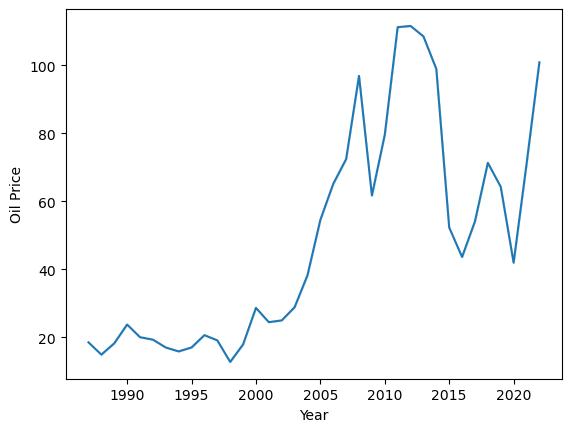

In [109]:
#Line Chart
sns.lineplot(data=df_final, x='Year', y='Oil Price')
plt.savefig('Line_Chart_yearly.png', bbox_inches='tight', dpi=300)

## 4. Hypotheses

#### 1. When there is higher demand for heating oil during the winter months, then it is leading to increased oil consumption and oil prices.
#### 2. When OPEC reduces its export quotas, member countries must decrease their oil production, then it is leading to a decrease in global supply. This reduction in supply can put upward pressure on oil prices.

## 5. Export data

In [96]:
# Exporting data
df_final.to_csv(os.path.join(path, '01 Data', 'cleaned_merged_with_oilprice.csv'))